In [1]:
import nltk
import pickle
from nltk.corpus import stopwords
import re

In [2]:
with open('nytimes.txt', 'r', encoding='utf8') as f:
    content = f.read()

In [3]:
print(content)

 Hurray for the HotBlack Coffee cafe in Toronto for declining to offer Wi-Fi to its customers. There are other such cafes, to be sure, including seven of the eight New York City locations of Café Grumpy. But it’s HotBlack’s reason for the electronic blackout that is cause for hosannas. As its president, Jimson Bienenstock, explained, his aim is to get customers to talk with one another instead of being buried in their portable devices. “It’s about creating a social vibe,” he told a New York Times reporter. “We’re a vehicle for human interaction, otherwise it’s just a commodity.” What a novel idea! Perhaps Mr. Bienenstock instinctively knows what medical science has been increasingly demonstrating for decades: Social interaction is a critically important contributor to good health and longevity. Personally, I don’t need research-based evidence to appreciate the value of making and maintaining social connections. I experience it daily during my morning walk with up to three women, then b

Text preprocessing

In [4]:
# 1. 불필요한 symbols과 marks 제거하기
# 다른 문자나 기호도 추가로 제거할 수 있습니다. 
# String function인 replace를 사용할 수도 있습니다.
# cleaned_content = content.replace('!', '').replace(',','').replace('.','').replace('“','').replace('”','').replace('\n','').replace('’','')
cleaned_content = re.sub(r'[^\.\?\!\w\d\s]','',content)
print(cleaned_content)

 Hurray for the HotBlack Coffee cafe in Toronto for declining to offer WiFi to its customers. There are other such cafes to be sure including seven of the eight New York City locations of Café Grumpy. But its HotBlacks reason for the electronic blackout that is cause for hosannas. As its president Jimson Bienenstock explained his aim is to get customers to talk with one another instead of being buried in their portable devices. Its about creating a social vibe he told a New York Times reporter. Were a vehicle for human interaction otherwise its just a commodity. What a novel idea! Perhaps Mr. Bienenstock instinctively knows what medical science has been increasingly demonstrating for decades Social interaction is a critically important contributor to good health and longevity. Personally I dont need researchbased evidence to appreciate the value of making and maintaining social connections. I experience it daily during my morning walk with up to three women then before and after my swi

In [5]:
# 2. Case conversion; 대문자를 소문자로 바꾸기
cleaned_content = cleaned_content.lower()

In [6]:
# 3. Word tokenization
word_tokens = nltk.word_tokenize(cleaned_content)
print(word_tokens)

['hurray', 'for', 'the', 'hotblack', 'coffee', 'cafe', 'in', 'toronto', 'for', 'declining', 'to', 'offer', 'wifi', 'to', 'its', 'customers', '.', 'there', 'are', 'other', 'such', 'cafes', 'to', 'be', 'sure', 'including', 'seven', 'of', 'the', 'eight', 'new', 'york', 'city', 'locations', 'of', 'café', 'grumpy', '.', 'but', 'its', 'hotblacks', 'reason', 'for', 'the', 'electronic', 'blackout', 'that', 'is', 'cause', 'for', 'hosannas', '.', 'as', 'its', 'president', 'jimson', 'bienenstock', 'explained', 'his', 'aim', 'is', 'to', 'get', 'customers', 'to', 'talk', 'with', 'one', 'another', 'instead', 'of', 'being', 'buried', 'in', 'their', 'portable', 'devices', '.', 'its', 'about', 'creating', 'a', 'social', 'vibe', 'he', 'told', 'a', 'new', 'york', 'times', 'reporter', '.', 'were', 'a', 'vehicle', 'for', 'human', 'interaction', 'otherwise', 'its', 'just', 'a', 'commodity', '.', 'what', 'a', 'novel', 'idea', '!', 'perhaps', 'mr.', 'bienenstock', 'instinctively', 'knows', 'what', 'medical', 

In [7]:
# 4. POS tagging
# 영어의 경우는 nltk에서 제공하는 pos_tag() 함수를 사용해서 품사 태깅을 할 수 있습니다.
# pos_tag()의 입력값으로는 단어의 리스트가 들어가야 합니다.
tokens_pos = nltk.pos_tag(word_tokens)
print(tokens_pos)

[('hurray', 'NN'), ('for', 'IN'), ('the', 'DT'), ('hotblack', 'NN'), ('coffee', 'NN'), ('cafe', 'NN'), ('in', 'IN'), ('toronto', 'NN'), ('for', 'IN'), ('declining', 'VBG'), ('to', 'TO'), ('offer', 'VB'), ('wifi', 'NN'), ('to', 'TO'), ('its', 'PRP$'), ('customers', 'NNS'), ('.', '.'), ('there', 'EX'), ('are', 'VBP'), ('other', 'JJ'), ('such', 'JJ'), ('cafes', 'NNS'), ('to', 'TO'), ('be', 'VB'), ('sure', 'JJ'), ('including', 'VBG'), ('seven', 'CD'), ('of', 'IN'), ('the', 'DT'), ('eight', 'CD'), ('new', 'JJ'), ('york', 'NN'), ('city', 'NN'), ('locations', 'NNS'), ('of', 'IN'), ('café', 'NN'), ('grumpy', 'NN'), ('.', '.'), ('but', 'CC'), ('its', 'PRP$'), ('hotblacks', 'NNS'), ('reason', 'NN'), ('for', 'IN'), ('the', 'DT'), ('electronic', 'JJ'), ('blackout', 'NN'), ('that', 'WDT'), ('is', 'VBZ'), ('cause', 'NN'), ('for', 'IN'), ('hosannas', 'NN'), ('.', '.'), ('as', 'IN'), ('its', 'PRP$'), ('president', 'NN'), ('jimson', 'NN'), ('bienenstock', 'NN'), ('explained', 'VBD'), ('his', 'PRP$'), (

In [8]:
# 명사 단어만 추출하기
# 품사 정보: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
NN_words = []
for word, pos in tokens_pos:
    if 'NN' in pos:
        NN_words.append(word)
print(NN_words)

['hurray', 'hotblack', 'coffee', 'cafe', 'toronto', 'wifi', 'customers', 'cafes', 'york', 'city', 'locations', 'café', 'grumpy', 'hotblacks', 'reason', 'blackout', 'cause', 'hosannas', 'president', 'jimson', 'bienenstock', 'aim', 'customers', 'devices', 'vibe', 'york', 'times', 'vehicle', 'interaction', 'commodity', 'idea', 'bienenstock', 'science', 'decades', 'interaction', 'contributor', 'health', 'longevity', 'evidence', 'value', 'connections', 'experience', 'morning', 'walk', 'women', 'swim', 'locker', 'room', 'ymca', 'use', 'devices', 'locker', 'room', 'experience', 'friends', 'i', 'share', 'joys', 'sorrows', 'women', 'problems', 'board', 'advice', 'counsel', 'laugh', 'brightens', 'day', 'studies', 'life', 'harvard', 'health', 'watch', 'dozens', 'studies', 'people', 'relationships', 'family', 'friends', 'community', 'health', 'problems', 'longer', 'study', 'men', 'women', 'county', 'calif.', 'lisa', 'f.', 'berkman', 'syme', 'people', 'others', 'times', 'nineyear', 'study', 'people

In [9]:
# Lemmatization
# nltk에서 제공되는 WordNetLemmatizer을 이용하는 경우 
# 명사의 경우는 보통 복수 -> 단수 형태로 변형
# for more details, please see https://textminingonline.com/dive-into-nltk-part-iv-stemming-and-lemmatization
wlem = nltk.WordNetLemmatizer()
lemmatized_words = []
for word in NN_words:
    new_word = wlem.lemmatize(word)
    lemmatized_words.append(new_word)

print(lemmatized_words)

['hurray', 'hotblack', 'coffee', 'cafe', 'toronto', 'wifi', 'customer', 'cafe', 'york', 'city', 'location', 'café', 'grumpy', 'hotblacks', 'reason', 'blackout', 'cause', 'hosanna', 'president', 'jimson', 'bienenstock', 'aim', 'customer', 'device', 'vibe', 'york', 'time', 'vehicle', 'interaction', 'commodity', 'idea', 'bienenstock', 'science', 'decade', 'interaction', 'contributor', 'health', 'longevity', 'evidence', 'value', 'connection', 'experience', 'morning', 'walk', 'woman', 'swim', 'locker', 'room', 'ymca', 'use', 'device', 'locker', 'room', 'experience', 'friend', 'i', 'share', 'joy', 'sorrow', 'woman', 'problem', 'board', 'advice', 'counsel', 'laugh', 'brightens', 'day', 'study', 'life', 'harvard', 'health', 'watch', 'dozen', 'study', 'people', 'relationship', 'family', 'friend', 'community', 'health', 'problem', 'longer', 'study', 'men', 'woman', 'county', 'calif.', 'lisa', 'f.', 'berkman', 'syme', 'people', 'others', 'time', 'nineyear', 'study', 'people', 'tie', 'robbins', 'b

In [10]:
# Stopwords removal
# 1차적으로 nltk에서 제공하는 불용어사전을 이용해서 불용어를 제거할 수 있습니다.

stopwords_list = stopwords.words('english') #nltk에서 제공하는 불용어사전 이용
#print('stopwords: ', stopwords_list)
unique_NN_words = set(lemmatized_words)
final_NN_words = lemmatized_words

# 불용어 제거
for word in unique_NN_words:
    if word in stopwords_list:
        while word in final_NN_words: final_NN_words.remove(word)
            

In [11]:
# 제거하거자 하는 단어가 nltk에서 제공되는 사전에 포함되어 있지 않은 경우에, 아래와 같이 직접 만들어 사용할 수도 있습니다.
customized_stopwords = ['be', 'today', 'yesterday', "it’s", "don’t"] # 직접 만든 불용어 사전
unique_NN_words1 = set(final_NN_words)
for word in unique_NN_words1:
    if word in customized_stopwords:
        while word in final_NN_words: final_NN_words.remove(word)

print(final_NN_words)

['hurray', 'hotblack', 'coffee', 'cafe', 'toronto', 'wifi', 'customer', 'cafe', 'york', 'city', 'location', 'café', 'grumpy', 'hotblacks', 'reason', 'blackout', 'cause', 'hosanna', 'president', 'jimson', 'bienenstock', 'aim', 'customer', 'device', 'vibe', 'york', 'time', 'vehicle', 'interaction', 'commodity', 'idea', 'bienenstock', 'science', 'decade', 'interaction', 'contributor', 'health', 'longevity', 'evidence', 'value', 'connection', 'experience', 'morning', 'walk', 'woman', 'swim', 'locker', 'room', 'ymca', 'use', 'device', 'locker', 'room', 'experience', 'friend', 'share', 'joy', 'sorrow', 'woman', 'problem', 'board', 'advice', 'counsel', 'laugh', 'brightens', 'day', 'study', 'life', 'harvard', 'health', 'watch', 'dozen', 'study', 'people', 'relationship', 'family', 'friend', 'community', 'health', 'problem', 'longer', 'study', 'men', 'woman', 'county', 'calif.', 'lisa', 'f.', 'berkman', 'syme', 'people', 'others', 'time', 'nineyear', 'study', 'people', 'tie', 'robbins', 'book',

In [12]:
from collections import Counter
c = Counter(final_NN_words) # input type should be a list of words (or tokens)
print(c)
k = 20
print(c.most_common(k)) # 빈도수 기준 상위 k개 단어 출력

Counter({'health': 11, 'people': 11, 'researcher': 7, 'study': 6, 'tie': 6, 'interaction': 5, 'friend': 4, 'others': 4, 'exercise': 4, 'york': 3, 'time': 3, 'connection': 3, 'woman': 3, 'problem': 3, 'lifestyle': 3, 'lack': 3, 'heart': 3, 'death': 3, 'connectedness': 3, 'disease': 3, 'research': 3, 'inflammation': 3, 'texas': 3, 'seppala': 3, 'cafe': 2, 'customer': 2, 'reason': 2, 'bienenstock': 2, 'device': 2, 'longevity': 2, 'evidence': 2, 'experience': 2, 'locker': 2, 'room': 2, 'life': 2, 'men': 2, 'robbins': 2, 'book': 2, 'practice': 2, 'obesity': 2, 'habit': 2, 'journal': 2, 'risk': 2, 'university': 2, 'center': 2, 'condition': 2, 'mortality': 2, 'loneliness': 2, 'isolation': 2, 'blood': 2, 'pressure': 2, 'level': 2, 'stress': 2, 'wellbeing': 2, 'report': 2, 'behavior': 2, 'percent': 2, 'hurray': 1, 'hotblack': 1, 'coffee': 1, 'toronto': 1, 'wifi': 1, 'city': 1, 'location': 1, 'café': 1, 'grumpy': 1, 'hotblacks': 1, 'blackout': 1, 'cause': 1, 'hosanna': 1, 'president': 1, 'jimson

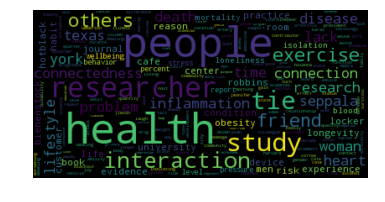

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

total_words = ''
for word in final_NN_words:
    total_words = total_words+' '+word

wordcloud = WordCloud(max_font_size=50, relative_scaling=.9).generate(total_words)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()